In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, PredictionErrorDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Function to load data from CSV
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Function to split data into features and labels
def split_data(data):
    X = data[['Time', 'Temprature', '%tanD', 'Resistivity', 'Permittivity', 'hour', 'BDV']]
    y = data['I_pol(t)(uA)']
    return X, y

# Function to train Linear Regression model
def train_linear_regression(X_train, y_train):
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    return linear_model

# Function to train Polynomial Regression model
def train_polynomial_regression(X_train, y_train, degree=2):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    return poly_model, poly_features

# Function to train Neural Network model
def train_neural_network(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh', learning_rate_init=0.001, max_iter=2000, random_state=1)
    nn_model.fit(X_train_scaled, y_train)
    return nn_model, scaler

# Function to train K-Nearest Neighbors model
def train_knn(X_train, y_train, n_neighbors=5):
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    return knn_model

# Function to train Support Vector Regression model
def train_svr(X_train, y_train):
    svr_model = SVR(kernel='rbf')
    svr_model.fit(X_train, y_train)
    return svr_model

# Function to train Decision Tree Regression model
def train_decision_tree(X_train, y_train):
    tree_model = DecisionTreeRegressor(random_state=1)
    tree_model.fit(X_train, y_train)
    return tree_model

# Function to train Random Forest Regression model
def train_random_forest(X_train, y_train):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
    rf_model.fit(X_train, y_train)
    return rf_model

# Function to train Gradient Boosting Regression model
def train_gradient_boosting(X_train, y_train):
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=1)
    gb_model.fit(X_train, y_train)
    return gb_model

# Function to predict with a model (for Polynomial Regression, pass the poly_features as well)
def predict(model, X_test, poly_features=None, scaler=None):
    if poly_features:
        X_test_transformed = poly_features.transform(X_test)
        return model.predict(X_test_transformed)
    elif scaler:
        X_test_scaled = scaler.transform(X_test)
        return model.predict(X_test_scaled)
    return model.predict(X_test)

# Function to evaluate models (returns a dictionary of metrics)
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return {'MSE': mse, 'R2 Score': r2, 'MAE': mae}

# Function to save results to a text file
def save_results_to_file(results, file_path='result.txt'):
    with open(file_path, 'w') as f:
        f.write("Model Comparison Results:\n")
        f.write("Model\tMSE\tR2 Score\tMAE\tMean % Error\n")
        for i in range(len(results['Model'])):
            f.write(f"{results['Model'][i]}\t{results['MSE'][i]:.4f}\t{results['R2 Score'][i]:.4f}\t{results['MAE'][i]:.4f}\t{results['Mean % Error'][i]:.4f}\n")

# Function to compare models and print results
def compare_models(results):
    from IPython.display import display
    comparison_df = pd.DataFrame(results)
    display(comparison_df)
    return comparison_df  # Return for further use

# Function to calculate mean percentage error
def mean_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual) * 100)


In [18]:
def store_results_and_plot(results, model_name, metrics, y_test, y_pred):
    """
    Stores the evaluation metrics in the results dictionary and displays the prediction error plot 
    with labels indicating the algorithm name.

    Parameters:
    - results: Dictionary to store evaluation metrics
    - model_name: Name of the model (e.g., 'Linear Regression')
    - metrics: Dictionary containing evaluation metrics (e.g., 'MSE', 'R2 Score', 'MAE')
    - y_test: Actual target values from the test set
    - y_pred: Predicted target values
    """
    global subplot_idx  # Use the global subplot index to track which subplot to use
    ax = axes[subplot_idx]
    # Store the results in the results dictionary
    results['Model'].append(model_name)
    results['MSE'].append(metrics['MSE'])
    results['R2 Score'].append(metrics['R2 Score'])
    results['MAE'].append(metrics['MAE'])
    results['Mean % Error'].append(mean_percentage_error(y_test, y_pred))

    # Create a prediction error plot with kind='actual_vs_predicted'
    display = PredictionErrorDisplay.from_predictions(y_test, y_pred, kind='actual_vs_predicted',ax=ax)

    # Customize the plot with labels and titles
    display.ax_.set_title(f'Actual vs Predicted: {model_name}')
    subplot_idx += 1 

,Model,MSE,R2 Score,MAE,Mean % Error
0,Linear Regression,9.964212e-04,0.834598,0.023429,73.706597
1,Polynomial Regression,3.455123e-03,0.426464,0.047871,156.864129
2,Neural Network,3.002829e-05,0.995015,0.004278,15.739036
3,K-Nearest Neighbors,1.795404e-09,1.000000,0.000021,0.030897
4,Support Vector Regression,3.541207e-03,0.412174,0.051959,222.605186
5,Decision Tree Regression,2.961062e-09,1.000000,0.000035,0.048106
6,Random Forest Regression,1.343960e-09,1.000000,0.000020,0.028437
7,Gradient Boosting Regression,4.862014e-06,0.999193,0.001658,4.170546


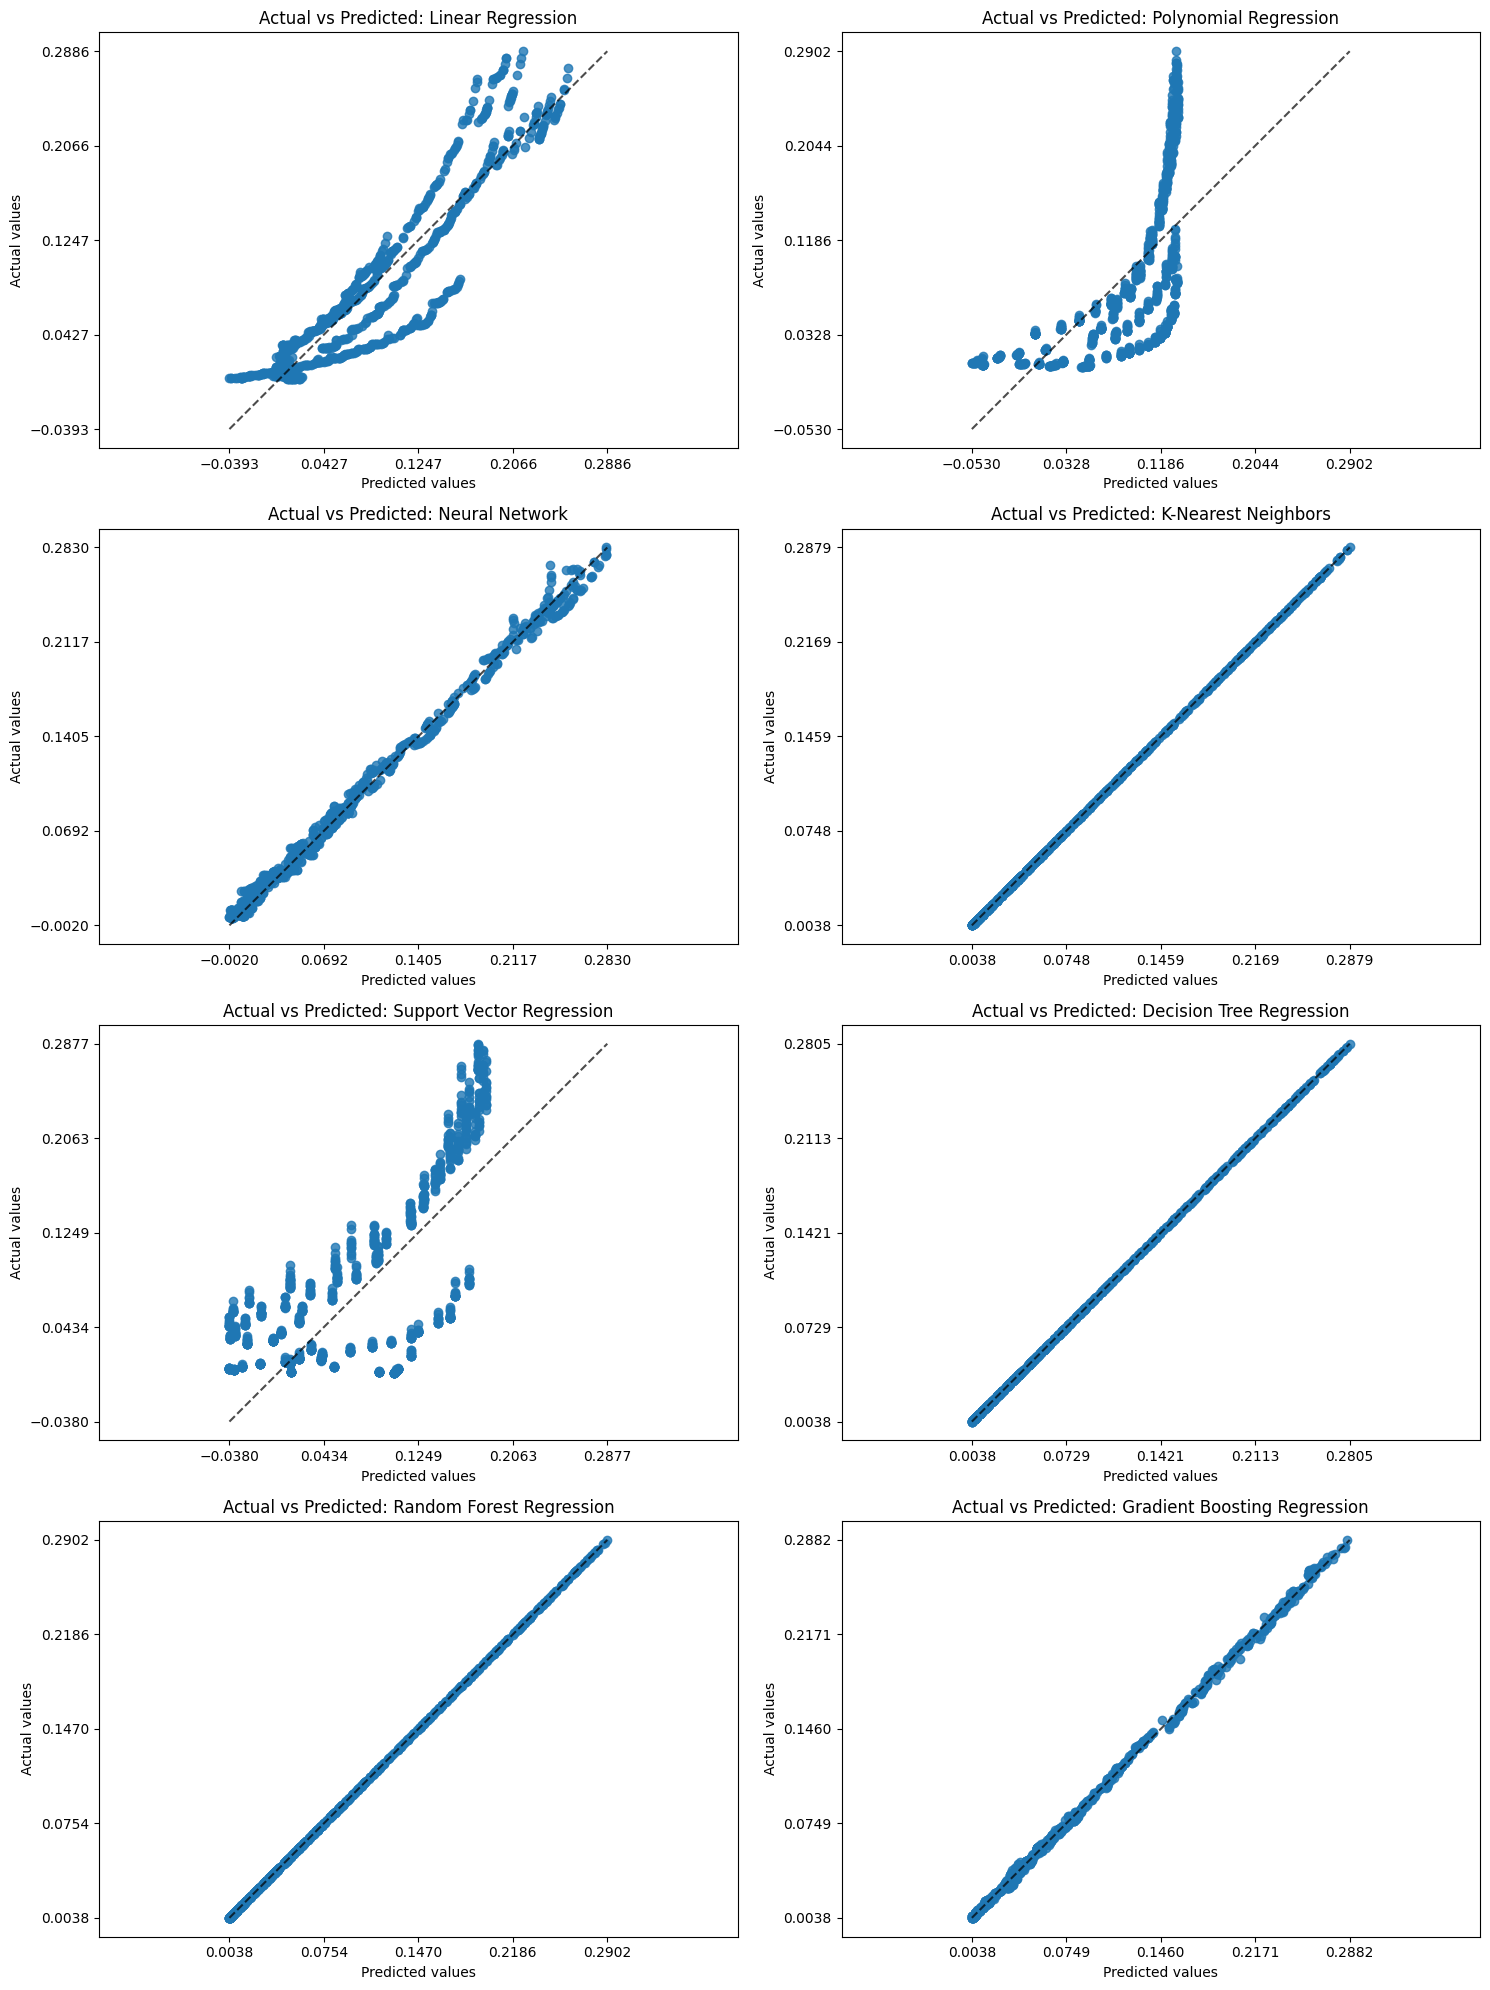

In [19]:
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
train_data = load_data('combined_dataset.csv')
test_size=0.2
random_state=30 
train_data = train_data.dropna()
X, y = split_data(train_data)
# Split training and test data into features (X) and labels (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Initialize a results list to store metrics for each model
results = {
    'Model': [],
    'MSE': [],
    'R2 Score': [],
    'MAE': [],
    'Mean % Error': []  # New column for mean percentage error
}
num_models = 8  # Adjust this based on the number of models
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  # 4x2 grid for subplots
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration
subplot_idx = 0
# Train and evaluate Linear Regression model
linear_model = train_linear_regression(X_train, y_train)
y_pred_linear = predict(linear_model, X_test)
linear_metrics = evaluate_model(y_test, y_pred_linear)
store_results_and_plot(results, model_name='Linear Regression', metrics=linear_metrics, y_test=y_test, y_pred=y_pred_linear)
# PredictionErrorDisplay.from_estimator(y_test, y_pred_linear)

# results['Model'].append('Linear Regression')
# results['MSE'].append(linear_metrics['MSE'])
# results['R2 Score'].append(linear_metrics['R2 Score'])
# results['MAE'].append(linear_metrics['MAE'])
# results['Mean % Error'].append(mean_percentage_error(y_test, y_pred_linear))

# Train and evaluate Polynomial Regression model
poly_model, poly_features = train_polynomial_regression(X_train, y_train, degree=2)
y_pred_poly = predict(poly_model, X_test, poly_features=poly_features)
poly_metrics = evaluate_model(y_test, y_pred_poly)
store_results_and_plot(results, model_name='Polynomial Regression', metrics=poly_metrics, y_test=y_test, y_pred=y_pred_poly)

# results['Model'].append('Polynomial Regression')
# results['MSE'].append(poly_metrics['MSE'])
# results['R2 Score'].append(poly_metrics['R2 Score'])
# results['MAE'].append(poly_metrics['MAE'])
# results['Mean % Error'].append(mean_percentage_error(y_test, y_pred_poly))

# Train and evaluate Neural Network model
nn_model, nn_scaler = train_neural_network(X_train, y_train)
y_pred_nn = predict(nn_model, X_test, scaler=nn_scaler)
nn_metrics = evaluate_model(y_test, y_pred_nn)
store_results_and_plot(results, model_name='Neural Network', metrics=nn_metrics, y_test=y_test, y_pred=y_pred_nn)

# results['Model'].append('Neural Network')
# results['MSE'].append(nn_metrics['MSE'])
# results['R2 Score'].append(nn_metrics['R2 Score'])
# results['MAE'].append(nn_metrics['MAE'])
# results['Mean % Error'].append(mean_percentage_error(y_test, y_pred_nn))

# Train and evaluate K-Nearest Neighbors model
knn_model = train_knn(X_train, y_train, n_neighbors=5)
y_pred_knn = predict(knn_model, X_test)
knn_metrics = evaluate_model(y_test, y_pred_knn)
store_results_and_plot(results, model_name='K-Nearest Neighbors', metrics=knn_metrics, y_test=y_test, y_pred=y_pred_knn)

# results['Model'].append('K-Nearest Neighbors')
# results['MSE'].append(knn_metrics['MSE'])
# results['R2 Score'].append(knn_metrics['R2 Score'])
# results['MAE'].append(knn_metrics['MAE'])
# results['Mean % Error'].append(mean_percentage_error(y_test, y_pred_knn))

# Train and evaluate Support Vector Regression model
svr_model = train_svr(X_train, y_train)
y_pred_svr = predict(svr_model, X_test)
svr_metrics = evaluate_model(y_test, y_pred_svr)
store_results_and_plot(results, model_name='Support Vector Regression', metrics=svr_metrics, y_test=y_test, y_pred=y_pred_svr)

# results['Model'].append('Support Vector Regression')
# results['MSE'].append(svr_metrics['MSE'])
# results['R2 Score'].append(svr_metrics['R2 Score'])
# results['MAE'].append(svr_metrics['MAE'])
# results['Mean % Error'].append(mean_percentage_error(y_test, y_pred_svr))

# Train and evaluate Decision Tree Regression model
tree_model = train_decision_tree(X_train, y_train)
y_pred_tree = predict(tree_model, X_test)
tree_metrics = evaluate_model(y_test, y_pred_tree)
store_results_and_plot(results, model_name='Decision Tree Regression', metrics=tree_metrics, y_test=y_test, y_pred=y_pred_tree)

# results['Model'].append('Decision Tree Regression')
# results['MSE'].append(tree_metrics['MSE'])
# results['R2 Score'].append(tree_metrics['R2 Score'])
# results['MAE'].append(tree_metrics['MAE'])
# results['Mean % Error'].append(mean_percentage_error(y_test, y_pred_tree))

# Train and evaluate Random Forest Regression model
rf_model = train_random_forest(X_train, y_train)
y_pred_rf = predict(rf_model, X_test)
rf_metrics = evaluate_model(y_test, y_pred_rf)
store_results_and_plot(results, model_name='Random Forest Regression', metrics=rf_metrics, y_test=y_test, y_pred=y_pred_rf)

# results['Model'].append('Random Forest Regression')
# results['MSE'].append(rf_metrics['MSE'])
# results['R2 Score'].append(rf_metrics['R2 Score'])
# results['MAE'].append(rf_metrics['MAE'])
# results['Mean % Error'].append(mean_percentage_error(y_test, y_pred_rf))

# Train and evaluate Gradient Boosting Regression model
gb_model = train_gradient_boosting(X_train, y_train)
y_pred_gb = predict(gb_model, X_test)
gb_metrics = evaluate_model(y_test, y_pred_gb)
store_results_and_plot(results, model_name='Gradient Boosting Regression', metrics=gb_metrics, y_test=y_test, y_pred=y_pred_gb)

# results['Model'].append('Gradient Boosting Regression')
# results['MSE'].append(gb_metrics['MSE'])
# results['R2 Score'].append(gb_metrics['R2 Score'])
# results['MAE'].append(gb_metrics['MAE'])
# results['Mean % Error'].append(mean_percentage_error(y_test, y_pred_gb))

# Compare models
comparison_df = compare_models(results)  # Print results in console
plt.tight_layout()
plt.show()
# save_results_to_file(results)  # Save results to result.txt

# Create a DataFrame to save actual and predicted values
# predictions_df = pd.DataFrame({
#     'Actual I_pol(t)(uA)': y_test,
#     'Predicted Linear': y_pred_linear,
#     'Predicted Polynomial': y_pred_poly,
#     'Predicted Neural Network': y_pred_nn,
#     'Predicted KNN': y_pred_knn,
#     'Predicted SVR': y_pred_svr,
#     'Predicted Decision Tree': y_pred_tree,
#     'Predicted Random Forest': y_pred_rf,
#     'Predicted Gradient Boosting': y_pred_gb
# })

# Calculate percent error for each model and add to predictions_df
# predictions_df['Percent Error Linear'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Linear']) / predictions_df['Actual I_pol(t)(uA)']) * 100
# predictions_df['Percent Error Polynomial'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Polynomial']) / predictions_df['Actual I_pol(t)(uA)']) * 100
# predictions_df['Percent Error Neural Network'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Neural Network']) / predictions_df['Actual I_pol(t)(uA)']) * 100
# predictions_df['Percent Error KNN'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted KNN']) / predictions_df['Actual I_pol(t)(uA)']) * 100
# predictions_df['Percent Error SVR'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted SVR']) / predictions_df['Actual I_pol(t)(uA)']) * 100
# predictions_df['Percent Error Decision Tree'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Decision Tree']) / predictions_df['Actual I_pol(t)(uA)']) * 100
# predictions_df['Percent Error Random Forest'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Random Forest']) / predictions_df['Actual I_pol(t)(uA)']) * 100
# predictions_df['Percent Error Gradient Boosting'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Gradient Boosting']) / predictions_df['Actual I_pol(t)(uA)']) * 100

# Save the DataFrame with predictions to a new CSV file
# predictions_df.to_csv('test_data_with_predictions.csv', index=False)
# print("Predicted values saved to 'test_data_with_predictions.csv'.")
